# 📊 Análise de Dados - FIFA 19

## 🎯 Objetivo
Este notebook realiza uma **análise exploratória** dos dados do jogo FIFA 19, buscando insights sobre os jogadores, suas características e correlações entre atributos.

## 📂 Etapas da Análise:
1. **Carregamento dos Dados** - Importação do dataset e visualização inicial.
2. **Análise Inicial** - Verificação de tipos de dados, valores ausentes e estatísticas básicas.
3. **Limpeza e Tratamento** - Remoção de colunas irrelevantes e tratamento de valores nulos.
4. **Exploração dos Dados** - Visualização da distribuição de idade, correlação entre atributos e outras análises gráficas.
5. **Insights e Conclusão** - Interpretação dos dados e principais descobertas.

Este projeto é em conjunto do meu recente artigo do <a href src="https://medium.com/@data.guga/qualquer-semelhan%C3%A7a-%C3%A9-mera-coincid%C3%AAncia-sql-e-pandas-5b33c1551a23"> Medium</a> sobre todos os jogadores do FIFA19, utilizando comandos do Pandas semelhantes aos de SQL.

Nesse notebook adicionamos outras análises e maiores detalhes de como podemos realizar uma análise a partir do artigo publicado.

🚀 **Este notebook é um exemplo prático de análise de dados aplicada ao futebol!**  



# 1.0 - Bibliotecas

In [2]:
# Instalação das bibliotecas (retire o # para instalar)

#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn


In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## 1.1 Configurando o diretório reports
 

In [103]:
# Caminho absoluto para a pasta 'reports', subindo um nível a partir de 'notebook'
base_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))  # Sai da pasta 'notebook'
reports_path = os.path.join(base_dir, "reports")  # Caminho final para 'reports/'

# Criar a pasta 'reports' caso não exista
os.makedirs(reports_path, exist_ok=True)

# Salvar o gráfico na pasta 'reports' (copiar e colar no final do código)
#file_path = os.path.join(reports_path, "NOME_IMAGEM.png")
#plt.savefig(file_path, dpi=300, bbox_inches="tight")

## 1.2 Funções - Módulos

In [4]:
# Modulo shape

def shape(df):

    # calcula o shape dos tabela_full
    shape_fifa = fifa.shape

    # linhas
    linhas = shape_fifa[0]

    # colunas
    colunas = shape_fifa[1]

    # resultado
    print(f'O dataset possui {linhas} linhas e {colunas} colunas.')

In [5]:
# Modulo tabela de valores nulos

def nulos(df):

    tabela_full_nulos = fifa.isnull().sum()

    tabela_full_nulos_calc = (100 * tabela_full_nulos) / fifa.shape[0] 

    tabela_full_tipos = fifa.dtypes

    tabela_nulos = pd.concat([tabela_full_nulos, tabela_full_nulos_calc, tabela_full_tipos], axis=1)

    tabela_nulos_colunas = tabela_nulos.rename(columns={0: 'Qtd.', 1: 'Porcentagem (%)', 2: 'Dtype'}).sort_values(by='Porcentagem (%)' ,ascending=False)

    display(tabela_nulos_colunas)

# 2.0 - Importação e análise inicial

In [6]:
# Carregando os dados
fifa = pd.read_csv('https://raw.githubusercontent.com/dataPalacio/proj-fifa19/refs/heads/main/analise_fifa19/fifa19.csv', sep=',')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
# Conhecedo cada os tipos de tabela_full
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [9]:
# Dimensão do dataset
shape(fifa)

O dataset possui 18207 linhas e 89 colunas.


In [10]:
# Verificando a quantidade de valores nulos na tabela
fifa.isnull().sum().sort_values(ascending=False)

Loaned From    16943
RWB             2085
RDM             2085
CDM             2085
LDM             2085
               ...  
Photo              0
Potential          0
Flag               0
Overall            0
Unnamed: 0         0
Length: 89, dtype: int64

In [11]:
nulos(fifa)

,Qtd.,Porcentagem (%),Dtype
Loaned From,16943,93.057615,object
RWB,2085,11.451639,object
RDM,2085,11.451639,object
CDM,2085,11.451639,object
LDM,2085,11.451639,object
...,...,...,...
Photo,0,0.000000,object
Potential,0,0.000000,int64
Flag,0,0.000000,object
Overall,0,0.000000,int64


# 3.0 Data Manipulation


In [12]:
# Remoção de colunas desnecessárias

fifa = fifa.drop(columns=['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Loaned From', 'Real Face', 'Body Type', 'Loaned From'])

In [ ]:
# Removendo simbolos monetários e convertendo para float

def remover_simbolos(valor):
    if isinstance(valor, float):
        return valor
    
    valor = valor.replace('€', '')

    if 'M' in valor:
        return float(valor.replace('M', '')) * 1000000
    if 'K' in valor:
        return float(valor.replace('K', '')) * 1000

    return float(valor)

# Aplicando a função
fifa['Wage'] = fifa['Wage'].apply(remover_simbolos)
fifa['Release Clause'] = fifa['Release Clause'].apply(remover_simbolos)
fifa['Value'] = fifa['Value'].apply(remover_simbolos)
fifa['Wage'].head(10)


In [15]:
# Criando o dicionário de times e ligas
league_dict = {
    "Bundesliga": [
        "1. FC Nürnberg", "1. FSV Mainz 05", "Bayer 04 Leverkusen", "FC Bayern München",
        "Borussia Dortmund", "Borussia Mönchengladbach", "Eintracht Frankfurt",
        "FC Augsburg", "FC Schalke 04", "Fortuna Düsseldorf", "Hannover 96",
        "Hertha BSC", "RB Leipzig", "SC Freiburg", "TSG 1899 Hoffenheim",
        "VfB Stuttgart", "VfL Wolfsburg", "SV Werder Bremen"
    ],
    "Premier League": [
        "Arsenal", "Bournemouth", "Brighton & Hove Albion", "Burnley",
        "Cardiff City", "Chelsea", "Crystal Palace", "Everton", "Fulham",
        "Huddersfield Town", "Leicester City", "Liverpool", "Manchester City",
        "Manchester United", "Newcastle United", "Southampton", 
        "Tottenham Hotspur", "Watford", "West Ham United", "Wolverhampton Wanderers"
    ],
    "La Liga": [
        "Athletic Club de Bilbao", "Atlético Madrid", "CD Leganés",
        "Deportivo Alavés", "FC Barcelona", "Getafe CF", "Girona FC", 
        "Levante UD", "Rayo Vallecano", "RC Celta", "RCD Espanyol", 
        "Real Betis", "Real Madrid", "Real Sociedad", "Real Valladolid CF",
        "SD Eibar", "SD Huesca", "Sevilla FC", "Valencia CF", "Villarreal CF"
    ],
    "Serie A": [
        "Atalanta","Bologna","Cagliari","Chievo Verona","Empoli", "Fiorentina","Frosinone","Genoa",
        "Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma","Sampdoria","Sassuolo","SPAL",
        "Torino","Udinese"
    ],
    "Süper Lig": [
        "Akhisar Belediyespor","Alanyaspor", "Antalyaspor","Medipol Başakşehir FK","BB Erzurumspor","Beşiktaş JK",
        "Bursaspor","Çaykur Rizespor","Fenerbahçe SK", "Galatasaray SK","Göztepe SK","Kasimpaşa SK",
        "Kayserispor","Atiker Konyaspor","MKE Ankaragücü", "Sivasspor","Trabzonspor","Yeni Malatyaspor"
    ],
    "Ligue 1": [
        "Amiens SC", "Angers SCO", "AS Monaco", "AS Saint-Étienne", "Dijon FCO", "En Avant de Guingamp",
        "FC Nantes", "FC Girondins de Bordeaux", "LOSC Lille", "Montpellier HSC", "Nîmes Olympique", 
        "OGC Nice", "Olympique Lyonnais","Olympique de Marseille", "Paris Saint-Germain", 
        "RC Strasbourg Alsace", "Stade Malherbe Caen", "Stade de Reims", "Stade Rennais FC", "Toulouse Football Club"
    ],
    "Eredivisie": [
        "ADO Den Haag","Ajax", "AZ Alkmaar", "De Graafschap","Excelsior","FC Emmen","FC Groningen",
        "FC Utrecht", "Feyenoord","Fortuna Sittard", "Heracles Almelo","NAC Breda",
        "PEC Zwolle", "PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"
    ],
    "Liga Nos": [
        "Os Belenenses", "Boavista FC", "CD Feirense", "CD Tondela", "CD Aves", "FC Porto",
        "CD Nacional", "GD Chaves", "Clube Sport Marítimo", "Moreirense FC", "Portimonense SC", "Rio Ave FC",
        "Santa Clara", "SC Braga", "SL Benfica", "Sporting CP", "Vitória Guimarães", "Vitória de Setúbal"
    ]
}

# Criando um dicionário para países
league_country = {
    "Bundesliga": "Germany",
    "Premier League": "UK",
    "La Liga": "Spain",
    "Serie A": "Italy",
    "Süper Lig": "Turkey",
    "Ligue 1": "France",
    "Liga Nos": "Portugal",
    "Eredivisie": "Netherlands"
}

# Função para mapear a liga do clube
def get_league(club):
    for league, teams in league_dict.items():
        if club in teams:
            return league
    return None  # Se o time não for encontrado, retorna None

# Aplicando a função para preencher a liga
fifa["League"] = fifa["Club"].apply(get_league)

# Adicionando a coluna de país com base na liga
fifa["Country"] = fifa["League"].map(league_country)
fifa.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Country
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,La Liga,Spain
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,Serie A,Italy
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,Ligue 1,France
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,Premier League,UK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,Premier League,UK


In [ ]:
# Posições existentes no jogo
fifa['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [17]:
# Adicionando coluna de posição (defensivo, meio-campo, ataque)
def posicao(x):
    if x in ['CB', 'LB', 'RB', 'LCB', 'RCB', 'RWB', 'LWB']:
        return 'Defender'
    elif x in ['CDM', 'CM', 'CAM', 'LM', 'LCM', 'RCM', 'LDM', 'RDM', 'RAM', 'LAM', 'RM']:
        return 'Midfielder'
    elif x in ['ST', 'CF', 'LW', 'RW', 'LS', 'RS', 'RF', 'LF']:
        return 'Attacker'
    else:
        return 'GK'
    
fifa['Position_Group'] = fifa['Position'].apply(posicao)

In [18]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Country,Position_Group
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,La Liga,Spain,Attacker
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,Serie A,Italy,Attacker
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,Ligue 1,France,Attacker
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,Premier League,UK,GK
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,Premier League,UK,Midfielder


# 4.0 - Analise exploratória

In [19]:
# Lista de colunas do dataset
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Releas

In [20]:
# Qual o número de camisa mais popular do jogo?
fifa['Jersey Number'] = fifa['Jersey Number'].astype('Int64')
fifa['Jersey Number'].value_counts()

Jersey Number
8     612
7     604
10    593
11    590
6     586
     ... 
68      4
79      2
74      2
64      2
85      1
Name: count, Length: 99, dtype: Int64

In [ ]:
# Frequencia de número de camisa por posição 

# Selecionando apenas as colunas relevantes e remover valores ausentes  
df_filtered = fifa[['Jersey Number', 'Position']].dropna()  

# Contando a frequência de cada número de camisa por posição  
top_numbers = df_filtered.groupby('Position')['Jersey Number'].agg(lambda x: x.mode()[0]).reset_index()  
top_numbers.rename(columns={'Jersey Number': 'Top Jersey Number'}, inplace=True) # Renomeando a coluna para deixar mais claro

# Agrupando por 'Position' e 'Jersey Number' e contar o número de valores  
counts = df_filtered.groupby(['Position', 'Jersey Number']).size().reset_index(name='Count')  

# Agrupando o DataFrame 'top_numbers' com o df 'counts'  
top_numbers = pd.merge(top_numbers, counts,  left_on=['Position', 'Top Jersey Number'], right_on = ['Position', 'Jersey Number'], how='left')  

# Removendo a coluna 'Jersey Number' duplicada após o merge  
top_numbers.drop('Jersey Number', axis=1, inplace=True)  

top_numbers.head(10).sort_values(by='Count', ascending=False)  


,Position,Top Jersey Number,Count
5,GK,1,566
7,LB,3,198
1,CB,4,178
0,CAM,10,146
4,CM,8,110
8,LCB,5,104
2,CDM,6,98
9,LCM,8,70
6,LAM,8,8
3,CF,17,7


In [22]:
# Transformando a coluna 'Height' e 'Weight' para valores numéricos

# Convertendo peso (lbs → kg)
def peso(x):
    if isinstance(x, str):  # Verifica se o valor é string antes de usar replace
        x = x.replace('lbs', '')
    return float(x) * 0.453592  # Converter para kg

# Convertendo altura (pés e polegadas → cm)
def altura(x):
    if isinstance(x, str):  # Verifica se o valor é string antes de manipular
        feet, inches = x.split("'")  # Separar pés e polegadas
        return (int(feet) * 30.48) + (int(inches) * 2.54)  # Converter para cm
    return float(x)  # Caso já esteja numérico, apenas retorna o valor

# Aplicar conversões
fifa['Weight'] = fifa['Weight'].apply(peso)
fifa['Height'] = fifa['Height'].apply(altura)

In [23]:
display(fifa['Weight'].value_counts().head(10))
display(fifa['Height'].value_counts().head(10))

Weight
74.842680    1483
69.853168    1439
79.832192    1041
78.017824     987
72.121128     946
73.028312     936
73.935496     901
77.110640     860
76.203456     836
78.925008     705
Name: count, dtype: int64

Height
182.88    2881
177.80    2479
175.26    2238
180.34    2159
187.96    2015
185.42    1908
190.50     990
172.72     946
170.18     905
193.04     749
Name: count, dtype: int64

In [24]:
# Quantos países possuem jogadores no FIFA?
fifa['Nationality'].value_counts().count()

np.int64(164)

In [25]:
# Analisando a reputação dos jogadores
fifa['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

In [26]:
# Quais Jogadores possuem a maior reputação internacional?
fifa[fifa['International Reputation'] == 5][['Name', 'Nationality', 'Club']]


,Name,Nationality,Club
0,L. Messi,Argentina,FC Barcelona
1,Cristiano Ronaldo,Portugal,Juventus
2,Neymar Jr,Brazil,Paris Saint-Germain
7,L. Suárez,Uruguay,FC Barcelona
22,M. Neuer,Germany,FC Bayern München
109,Z. Ibrahimović,Sweden,LA Galaxy


In [27]:
# Qual a liga mais valiosa do FIFA19?
fifa.groupby('League')['Value'].sum().sort_values(ascending=False)

League
Premier League    6.172060e+09
La Liga           5.813615e+09
Serie A           4.571130e+09
Bundesliga        4.051610e+09
Ligue 1           3.095215e+09
Liga Nos          1.896410e+09
Süper Lig         1.286890e+09
Eredivisie        1.120845e+09
Name: Value, dtype: float64

In [28]:
# Qual o time mais valioso do FIFA19?
fifa_valuable = fifa.groupby('Club')['Value'].sum().sort_values(ascending=False)
fifa_valuable.head(10)


Club
Real Madrid            874425000.0
FC Barcelona           852600000.0
Manchester City        786555000.0
Juventus               704475000.0
FC Bayern München      679025000.0
Atlético Madrid        644525000.0
Paris Saint-Germain    625325000.0
Tottenham Hotspur      618450000.0
Chelsea                606815000.0
Manchester United      588850000.0
Name: Value, dtype: float64

In [29]:
# Quantos brasileiros temos no FIFA19?
brasukas = fifa[fifa['Nationality'] == 'Brazil'].shape
print(f'O jogo possui o total de {brasukas[0]} jogadores brasileiros')

O jogo possui o total de 827 jogadores brasileiros


In [30]:
# Quais os jogadores mais valiosos do FIFA19?
fifa[['Name', 'Value', 'Club','Position_Group']].sort_values(by='Value', ascending=False).head(10)

,Name,Value,Club,Position_Group
2,Neymar Jr,118500000.0,Paris Saint-Germain,Attacker
0,L. Messi,110500000.0,FC Barcelona,Attacker
4,K. De Bruyne,102000000.0,Manchester City,Midfielder
5,E. Hazard,93000000.0,Chelsea,Attacker
15,P. Dybala,89000000.0,Juventus,Attacker
16,H. Kane,83500000.0,Tottenham Hotspur,Attacker
25,K. Mbappé,81000000.0,Paris Saint-Germain,Midfielder
7,L. Suárez,80000000.0,FC Barcelona,Attacker
17,A. Griezmann,78000000.0,Atlético Madrid,Midfielder
10,R. Lewandowski,77000000.0,FC Bayern München,Attacker


In [31]:
# Agrupando todas as nacionalidades e somando o valor dos jogadores
fifa.groupby('Nationality')['Value'].sum().sort_values(ascending=False)

Nationality
Spain          4.706850e+09
Brazil         3.806375e+09
France         3.363355e+09
Germany        3.030110e+09
Argentina      2.883160e+09
                   ...     
Belize         2.500000e+05
Indonesia      1.800000e+05
Botswana       1.600000e+05
Puerto Rico    1.100000e+05
India          0.000000e+00
Name: Value, Length: 164, dtype: float64

In [32]:
# Qual a liga com mais jogadores? 
fifa['League'].value_counts()

League
Premier League    649
La Liga           616
Ligue 1           569
Bundesliga        548
Serie A           546
Eredivisie        506
Süper Lig         504
Liga Nos          482
Name: count, dtype: int64

In [33]:
# Qual posição tem mais jogadores?
fifa['Position_Group'].value_counts()

Position_Group
Midfielder    6838
Defender      5866
Attacker      3418
GK            2085
Name: count, dtype: int64

In [34]:
# Quais jogadores tem o maior salário?
fifa[['Name', 'Value', 'Nationality']].sort_values(by='Value', ascending=True, ).tail()

,Name,Value,Nationality
15,P. Dybala,89000000.0,Argentina
5,E. Hazard,93000000.0,Belgium
4,K. De Bruyne,102000000.0,Belgium
0,L. Messi,110500000.0,Argentina
2,Neymar Jr,118500000.0,Brazil


In [35]:
# Clube com maior média de salário e seu overall médio
med_salario_over = fifa.groupby('Club', as_index=False)[['Wage', 'Overall']].mean()
med_salario_over.sort_values(by='Wage', ascending=False, inplace=True)
med_salario_over.head(10)


,Club,Wage,Overall
470,Real Madrid,152030.303030,78.242424
212,FC Barcelona,146575.757576,78.030303
326,Juventus,131680.000000,82.280000
374,Manchester City,113363.636364,76.727273
375,Manchester United,102757.575758,77.242424
134,Chelsea,98454.545455,76.787879
363,Liverpool,87939.393939,76.000000
583,Tottenham Hotspur,79484.848485,76.696970
214,FC Bayern München,78827.586207,77.000000
52,Arsenal,78424.242424,75.181818


In [36]:
# 1. Carregar o dataset
# Substitua 'fifa19.csv' pelo caminho do seu arquivo
fifa_outliers = pd.read_csv('https://raw.githubusercontent.com/dataPalacio/proj-fifa19/refs/heads/main/analise_fifa19/fifa19.csv', sep=',')

# 2. Calcular o IQR (Intervalo Interquartil)
Q1 = fifa_outliers['Age'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = fifa_outliers['Age'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1  # Intervalo Interquartil

# 3. Definir os limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# 4. Identificar os outliers
outliers = fifa_outliers[(fifa_outliers['Age'] < limite_inferior) | (fifa_outliers['Age'] > limite_superior)]

# Exibir os outliers
print("Jogadores considerados outliers na coluna 'Age':")
display(outliers[['Name', 'Age']])


Jogadores considerados outliers na coluna 'Age':


,Name,Age
41,G. Buffon,40
554,S. Sorrentino,39
864,Hilton,40
1120,J. Villar,41
1294,A. Bizzarri,40
1952,P. Guiñazú,39
2225,C. Pizarro,39
2706,Cifuentes,39
2821,S. Bertoli,40
3128,D. Dainelli,39


### <b>Feature Engineering</b>

- Utilizarei feature engineering (engenharia de atributos) do tipo one hot encoding para adicionar uma nova coluna para identificar se aquele jogador nasceu em no país que já foi campeão da copa do mundo.

- Você como analista de dados terá que preparar os dados para o cientista realizar as análise com Machine Learning, correto? Você acha que Strings são usadas para as análises? Pois bem, caso você tenha descoberto algo, vai notar o motivo da minha escolha.

Países campeões: Brasil, Alemanha, Itália, Argentina, Uruguai, França, Espanha, Inglaterra <br>
Encoding: 0 = não, 1 = sim

In [37]:
# Aplicando o One hot Encoding

# Copiando a coluna "Nacionalidade"
fifa['Champions'] = fifa['Nationality'].copy()
fifa['Champions']

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Champions, Length: 18207, dtype: object

In [38]:
# Lista de países campeões do mundo
world_cup_winners = {"Brazil", "Germany", "Italy", "Argentina", "Uruguay", "France", "Spain", "England"}

# Criando a coluna "Champions" com encoding (1 para campeões, 0 para os demais)
fifa["Champions"] = fifa["Nationality"].apply(lambda x: 1 if x in world_cup_winners else 0)
fifa['Champions'] 


0        1
1        0
2        1
3        1
4        0
        ..
18202    1
18203    0
18204    1
18205    1
18206    1
Name: Champions, Length: 18207, dtype: int64

In [39]:
# Filtrando os tiozão com mais de 30 anos
fifa[fifa['Age'] > 30]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Country,Position_Group,Champions
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,6.0,11.0,15.0,14.0,8.0,226500000.0,La Liga,Spain,Attacker,1
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,7.0,11.0,15.0,14.0,11.0,127100000.0,Serie A,Italy,Attacker,0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,...,13.0,9.0,7.0,14.0,9.0,137400000.0,La Liga,Spain,Midfielder,0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,...,27.0,25.0,31.0,33.0,37.0,164000000.0,La Liga,Spain,Attacker,1
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,...,11.0,8.0,9.0,7.0,11.0,104600000.0,La Liga,Spain,Defender,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17842,182461,Zhou Ting,39,China PR,52,52,Dalian YiFang FC,10000.0,1000.0,1473,...,10.0,12.0,7.0,15.0,6.0,22000.0,None,NaN,Midfielder,0
17866,232676,N. Hatta,32,Japan,52,52,Júbilo Iwata,30000.0,1000.0,824,...,54.0,48.0,45.0,52.0,54.0,38000.0,None,NaN,GK,0
18043,237917,A. Suzuki,31,Japan,50,50,Yokohama F. Marinos,20000.0,1000.0,820,...,49.0,48.0,54.0,52.0,54.0,25000.0,None,NaN,GK,0
18171,237746,Y. Uchimura,33,Japan,48,48,Hokkaido Consadole Sapporo,20000.0,1000.0,1262,...,13.0,15.0,7.0,15.0,15.0,25000.0,None,NaN,Midfielder,0


In [40]:

# Filtrando os brazukas
top_over_br = fifa[(fifa['Nationality'] == 'Brazil')][['Name', 'Overall']].nlargest(5, columns='Overall')

top_over_br.head()

,Name,Overall
2,Neymar Jr,92
27,Casemiro,88
32,Coutinho,88
35,Marcelo,88
39,Thiago Silva,88


In [41]:
# Jogadores com maior diferença de Overall e Potential
fifa[(fifa['Overall'] > 90) & (fifa['Age'] > 25)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Country,Position_Group,Champions
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,6.0,11.0,15.0,14.0,8.0,226500000.0,La Liga,Spain,Attacker,1
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,7.0,11.0,15.0,14.0,11.0,127100000.0,Serie A,Italy,Attacker,0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,9.0,9.0,15.0,15.0,11.0,228100000.0,Ligue 1,France,Attacker,1
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,90.0,85.0,87.0,88.0,94.0,138600000.0,Premier League,UK,GK,1
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,15.0,13.0,5.0,10.0,13.0,196400000.0,Premier League,UK,Midfielder,0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,...,11.0,12.0,6.0,8.0,8.0,172100000.0,Premier League,UK,Attacker,0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,...,13.0,9.0,7.0,14.0,9.0,137400000.0,La Liga,Spain,Midfielder,0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,...,27.0,25.0,31.0,33.0,37.0,164000000.0,La Liga,Spain,Attacker,1
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,...,11.0,8.0,9.0,7.0,11.0,104600000.0,La Liga,Spain,Defender,1


In [42]:
tab_f1 = fifa[fifa['Overall'] > 90]
tab_f1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Country,Position_Group,Champions
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,6.0,11.0,15.0,14.0,8.0,226500000.0,La Liga,Spain,Attacker,1
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,7.0,11.0,15.0,14.0,11.0,127100000.0,Serie A,Italy,Attacker,0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,9.0,9.0,15.0,15.0,11.0,228100000.0,Ligue 1,France,Attacker,1
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,90.0,85.0,87.0,88.0,94.0,138600000.0,Premier League,UK,GK,1
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,15.0,13.0,5.0,10.0,13.0,196400000.0,Premier League,UK,Midfielder,0


In [43]:
# Jogadores com maior Potential do jogo (acrescentado mais filtros de nome, nacionalidade e clube))
top10_potential = fifa[fifa['Potential'] > 90].sort_values(by='Potential' ,ascending=False).nlargest(10, columns='Potential')
top10_potential[['Name', "Nationality", "Club"]]

,Name,Nationality,Club
25,K. Mbappé,France,Paris Saint-Germain
1,Cristiano Ronaldo,Portugal,Juventus
15,P. Dybala,Argentina,Juventus
0,L. Messi,Argentina,FC Barcelona
3,De Gea,Spain,Manchester United
9,J. Oblak,Slovenia,Atlético Madrid
2,Neymar Jr,Brazil,Paris Saint-Germain
229,G. Donnarumma,Italy,Milan
4,K. De Bruyne,Belgium,Manchester City
42,S. Umtiti,France,FC Barcelona


In [44]:
# Jogadores com maior diferença entre Overall e Potential
dif_pot = fifa[['Name', 'Nationality', 'Club', 'Potential', 'Overall']].copy()
dif_pot['dif_pot_over'] = dif_pot['Potential'] - dif_pot['Overall']
dif_pot = dif_pot.sort_values(by='dif_pot_over', ascending=False)
dif_pot.head()


,Name,Nationality,Club,Potential,Overall,dif_pot_over
18072,D. Campbell,Scotland,Aberdeen,76,50,26
16028,J. von Moos,Switzerland,FC Basel 1893,84,58,26
17175,B. Mumba,England,Sunderland,80,55,25
17784,K. Askildsen,Norway,Stabæk Fotball,77,52,25
16629,Y. Lenze,Germany,FC Schalke 04,82,57,25


# 5.0 - Data Visualization

In [45]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Country,Position_Group,Champions
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,6.0,11.0,15.0,14.0,8.0,226500000.0,La Liga,Spain,Attacker,1
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,7.0,11.0,15.0,14.0,11.0,127100000.0,Serie A,Italy,Attacker,0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,9.0,9.0,15.0,15.0,11.0,228100000.0,Ligue 1,France,Attacker,1
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,90.0,85.0,87.0,88.0,94.0,138600000.0,Premier League,UK,GK,1
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,15.0,13.0,5.0,10.0,13.0,196400000.0,Premier League,UK,Midfielder,0


C:\Users\gustavo.palacio\AppData\Local\Temp\ipykernel_23608\2566638041.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Name', data=top10_value, palette='viridis')


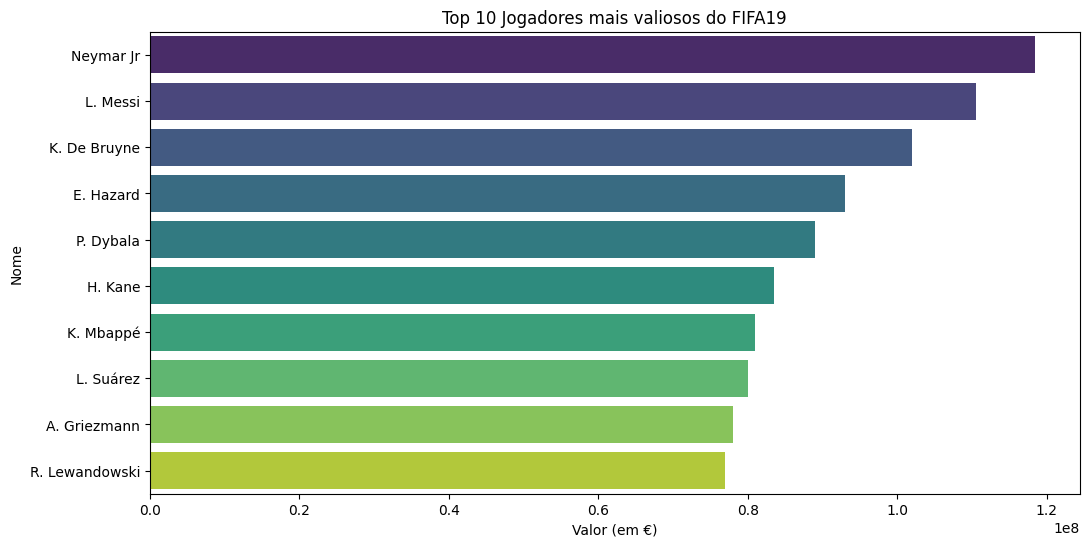

In [123]:
# Top 10 jogadores mais valiosos
top10_value = fifa[['Name', 'Value', 'Club', 'Position']].sort_values(by='Value', ascending=False).head(10)

#Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Value', y='Name', data=top10_value, palette='viridis')
plt.title('Top 10 Jogadores mais valiosos do FIFA19')
plt.xlabel('Valor (em €)')
plt.ylabel('Nome')

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "barplot_player_valioso.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()


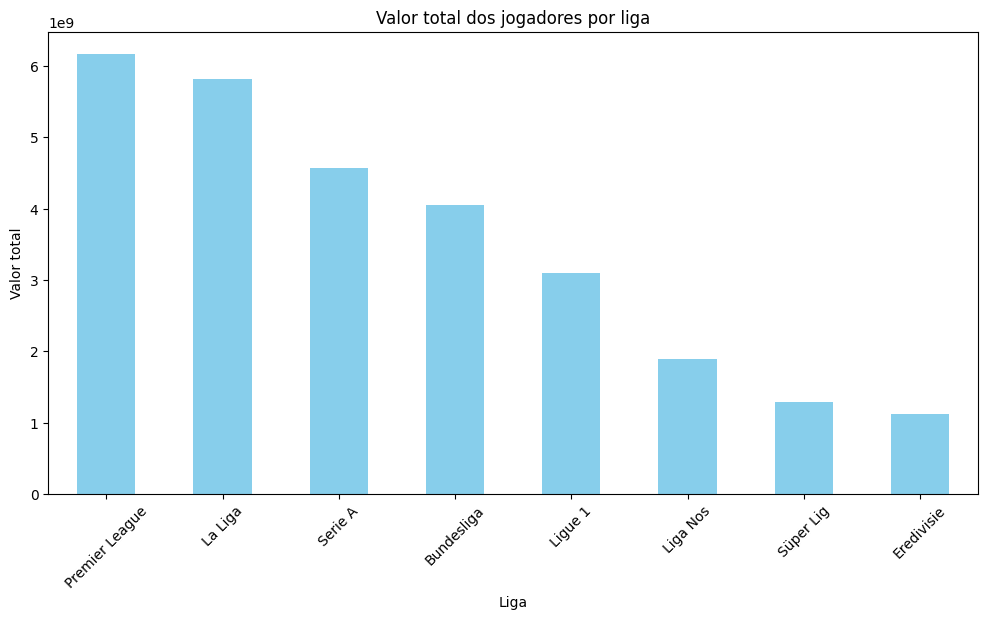

In [ ]:
# Qual a liga mais valiosa?
fifa.groupby('League')['Value'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Valor total dos jogadores por liga')
plt.ylabel('Valor total')
plt.xlabel('Liga')
plt.xticks(rotation=45)

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "barplot_total_liga.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()

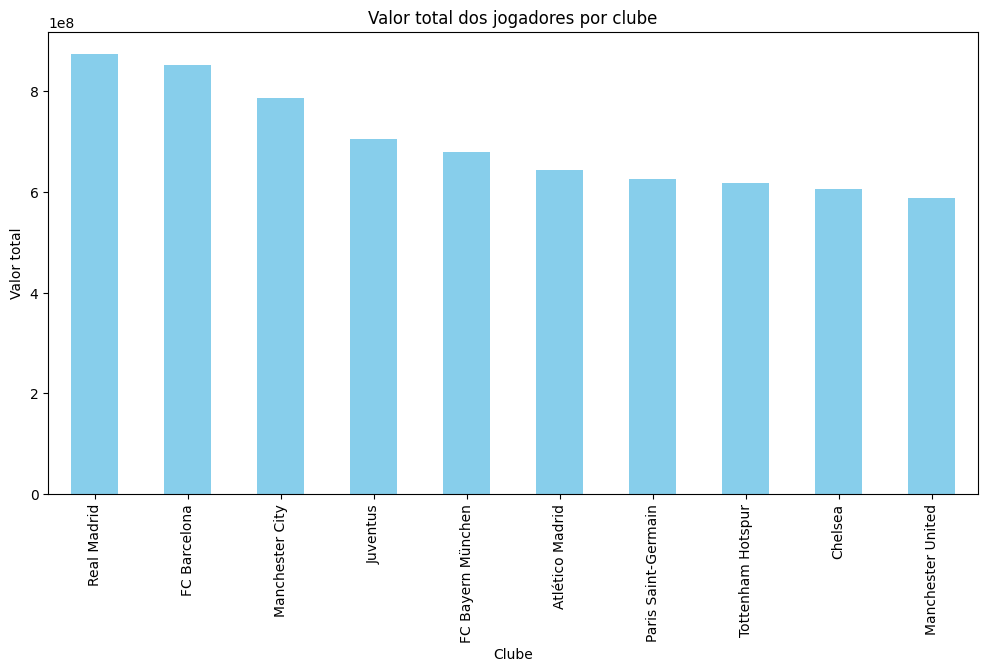

In [117]:
# Qual o clube mais valioso?
fifa.groupby('Club')['Value'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Valor total dos jogadores por clube')
plt.ylabel('Valor total')
plt.xlabel('Clube')

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "barplot_club_valioso.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()

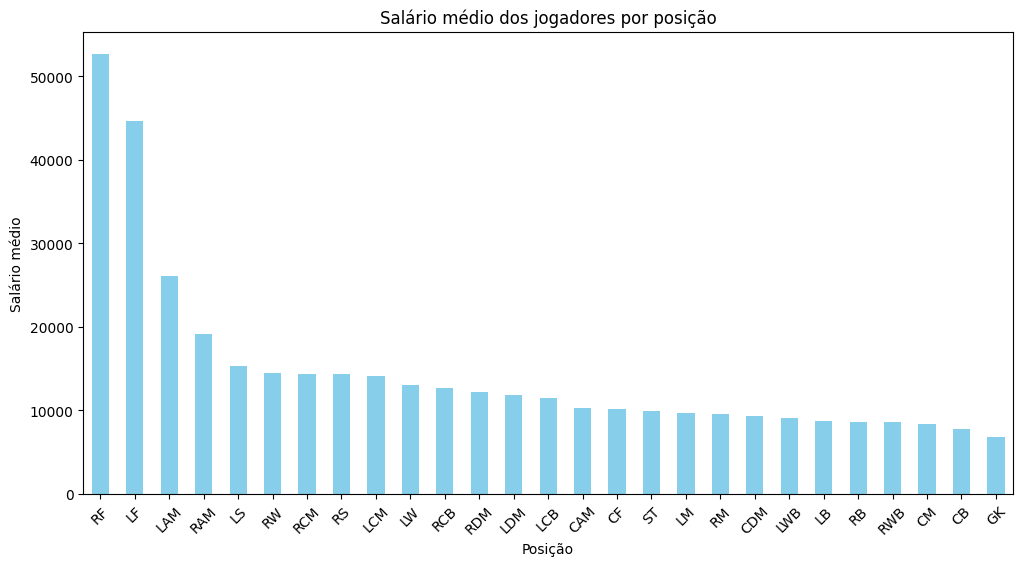

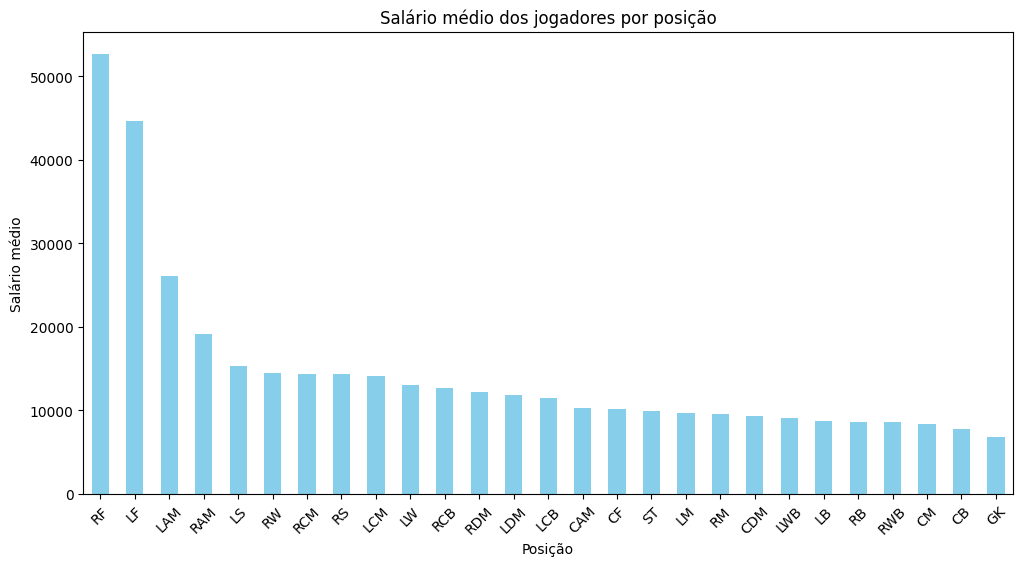

In [127]:
# Qual o salário médio dos jogadores por posição?
salario_posicao = fifa.groupby('Position')['Wage'].mean().sort_values(ascending=False)
salario_posicao.head()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
salario_posicao.plot(kind='bar', color='skyblue')
plt.title('Salário médio dos jogadores por posição')
plt.xlabel('Posição')
plt.ylabel('Salário médio')
plt.xticks(rotation=45)

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "barplot_salario_posicao.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show(0)


C:\Users\gustavo.palacio\AppData\Local\Temp\ipykernel_23608\348018575.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fifa, x='Nationality', order=order_nat, palette=cores)
C:\Users\gustavo.palacio\AppData\Local\Temp\ipykernel_23608\348018575.py:10: UserWarning: 
The palette list has fewer values (10) than needed (164) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=fifa, x='Nationality', order=order_nat, palette=cores)


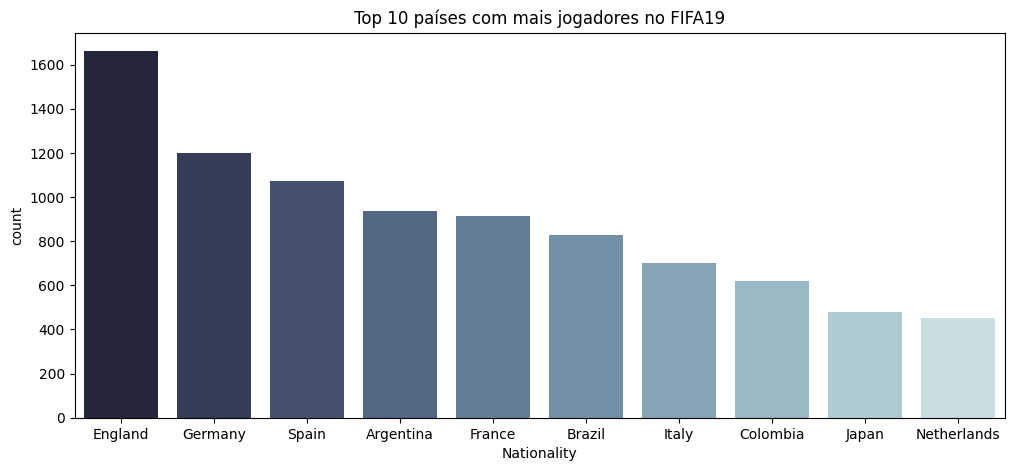

In [126]:
# Gráfico dos top 10 clubes com maior média de overall

# Ordenando os dados
order_nat = fifa['Nationality'].value_counts().index

# Plotagem do countplot
plt.figure(figsize=(12,5))
plt.title('Top 10 países com mais jogadores no FIFA19')
cores = sns.cubehelix_palette(n_colors=10, rot=-.2, reverse=True)
sns.countplot(data=fifa, x='Nationality', order=order_nat, palette=cores)
plt.xlim(-0.5,9.5)

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "countplot_top10_paises.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()


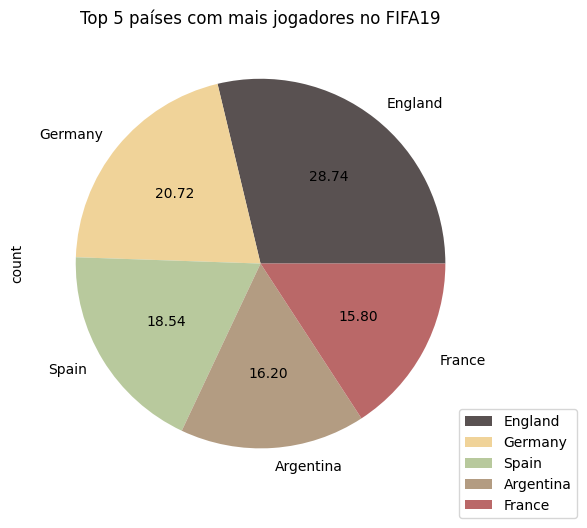

In [ ]:
# Quais os 5 países possuem mais jogadores no jogo?
fifa_nationality = fifa['Nationality'].value_counts().head()

# Plotando um gráfico de pizza
fifa_nationality.plot(kind ='pie', figsize=(6,6), autopct='%.2f', 
                    colors=('#595151', '#f0d399', '#b8c99d', '#b39c82', '#ba6868'))
plt.title('Top 5 países com mais jogadores no FIFA19')
plt.legend(bbox_to_anchor=(1.2,0.2))

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "pizza.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()

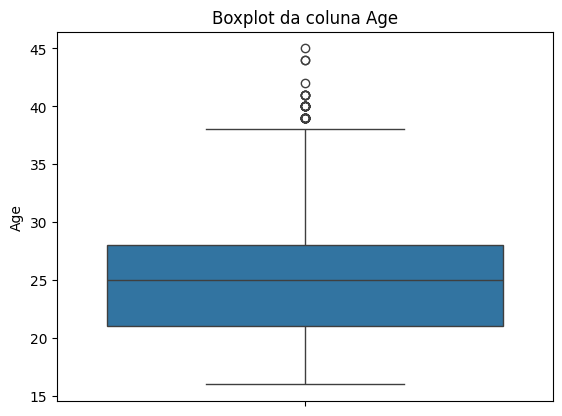

In [112]:
# Analisando os outliers da coluna idade
sns.boxplot(fifa.Age), plt.title('Boxplot da coluna Age')

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "boxplot_idade.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")


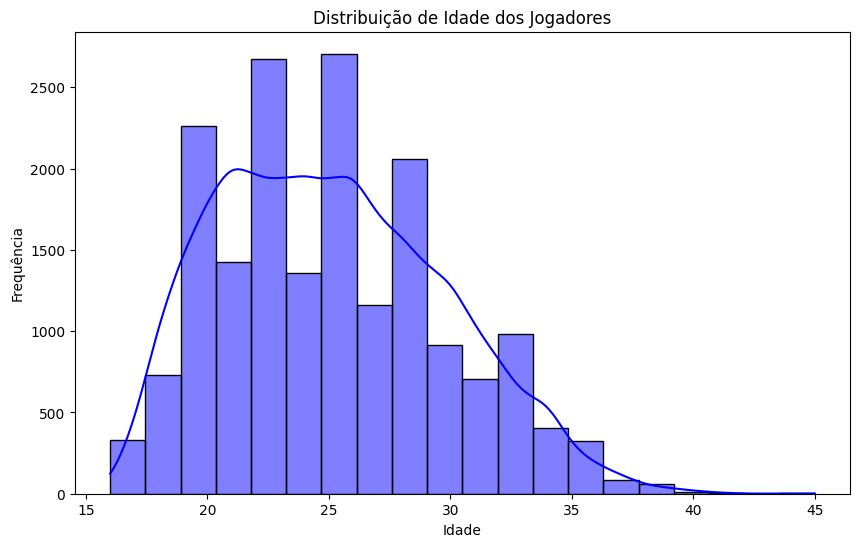

In [111]:
# Distribuição de idade dos jogadores

plt.figure(figsize=(10, 6))
sns.histplot(fifa['Age'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Idade dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "histplot_idade.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()

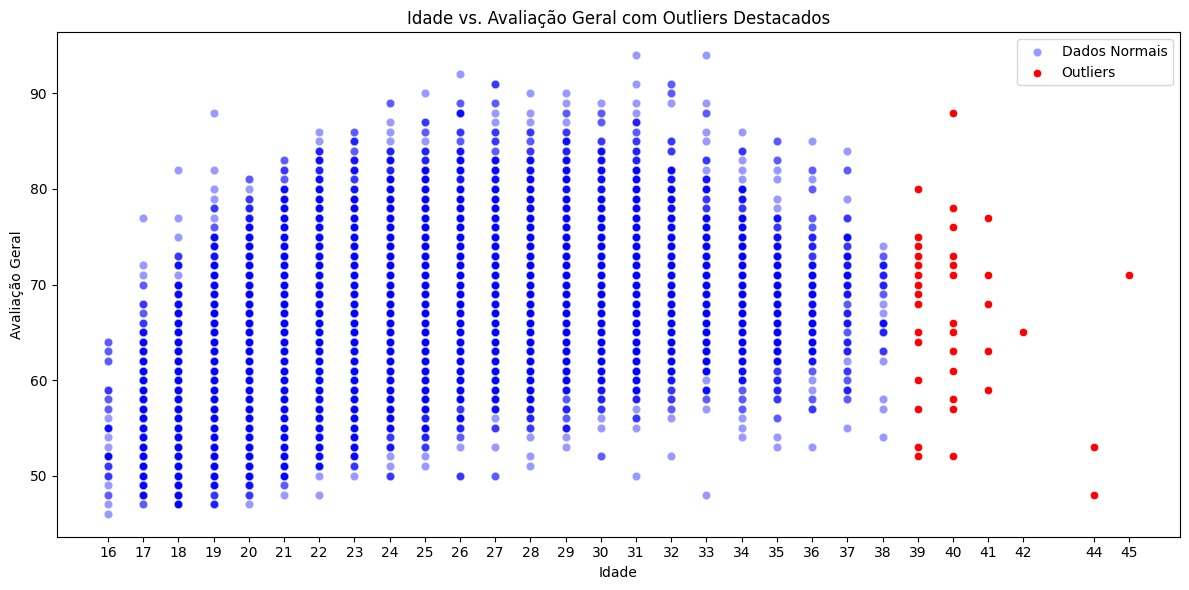

In [110]:
# Gráfico de Dispersão com Destaque para Outliers
plt.figure(figsize=(12, 6))

# Plot dos dados normais
sns.scatterplot(x=fifa['Age'], y=fifa['Overall'], color='blue', alpha=0.4, label='Dados Normais')

# Plot dos outliers
sns.scatterplot(x=outliers['Age'], y=outliers['Overall'], color='red', label='Outliers')

# Personalização do eixo X para mostrar todas as idades
idades_unicas = sorted(fifa['Age'].unique())  # Listando as idades únicas
plt.xticks(idades_unicas, rotation=0)  # Exibindo todas as idades no eixo X

# Título e rótulos
plt.title('Idade vs. Avaliação Geral com Outliers Destacados')
plt.xlabel('Idade')
plt.ylabel('Avaliação Geral')
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "scatter_outliers_idade.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()

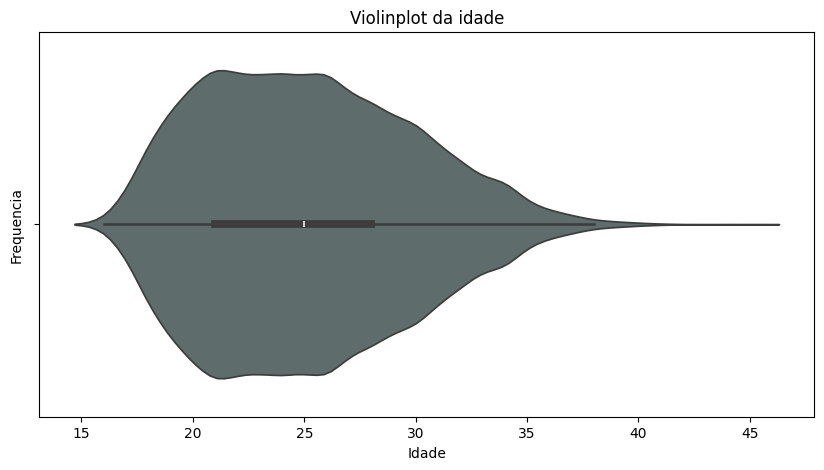

In [119]:
# Faixa de idade com mais jogadores

plt.figure(figsize=(10,5))
plt.title('Violinplot da idade')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
sns.violinplot(x=fifa.Age, color='#5c6e6e')

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "violin_idade.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()

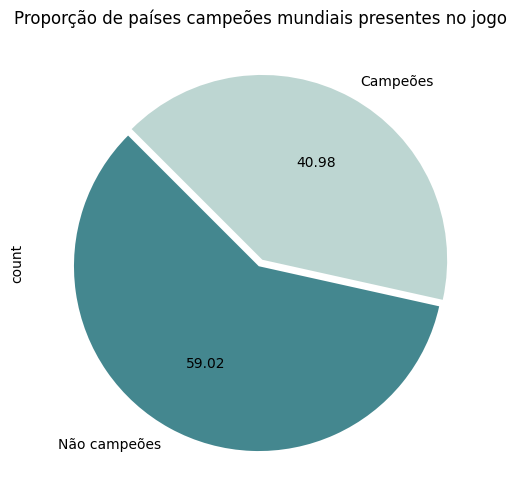

In [107]:
# Grafico de proporção de países campeões mundiais 

plt.figure(figsize=(8,6))
fifa['Champions'].value_counts().plot(
                                      kind='pie', autopct='%.2f',
                                      title='Proporção de países campeões mundiais presentes no jogo',
                                      labels=['Não campeões','Campeões'], 
                                      colors=['#44878f', '#bdd6d2'],
                                      explode=[0.02,0.02],
                                      startangle = 135)

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "proporcao_campeoes_jogo.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")


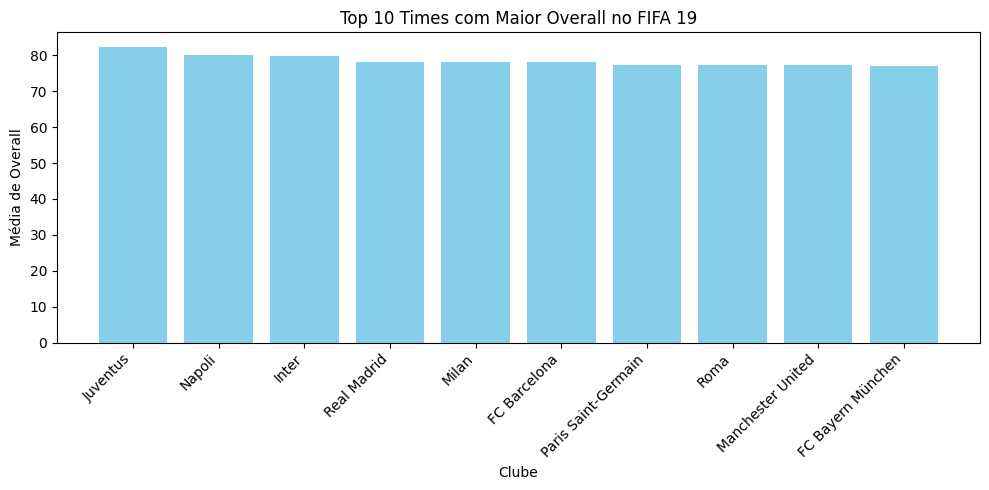

In [106]:
# Clubes com maior overall médio

# Agrupando por time e calculando a média do Overall
fifa_overall = fifa.groupby('Club')['Overall'].mean().sort_values(ascending=False)
fifa_overall = fifa_overall.reset_index()  # Converte para DataFrame
fifa_overall.columns = ['Club', 'Overall']  # Renomeia as colunas

# Selecionando os 10 clubes com maior média de Overall
top10_over = fifa_overall.nlargest(10, columns='Overall')

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(top10_over['Club'], top10_over['Overall'], color='skyblue')  # Usar plt.bar diretamente

# Configurações do gráfico
plt.title('Top 10 Times com Maior Overall no FIFA 19')
plt.xlabel('Clube')
plt.ylabel('Média de Overall')
plt.xticks(rotation=45, ha='right')  # Rotaciona e alinha os rótulos do eixo X
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "top10_overal_club.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()

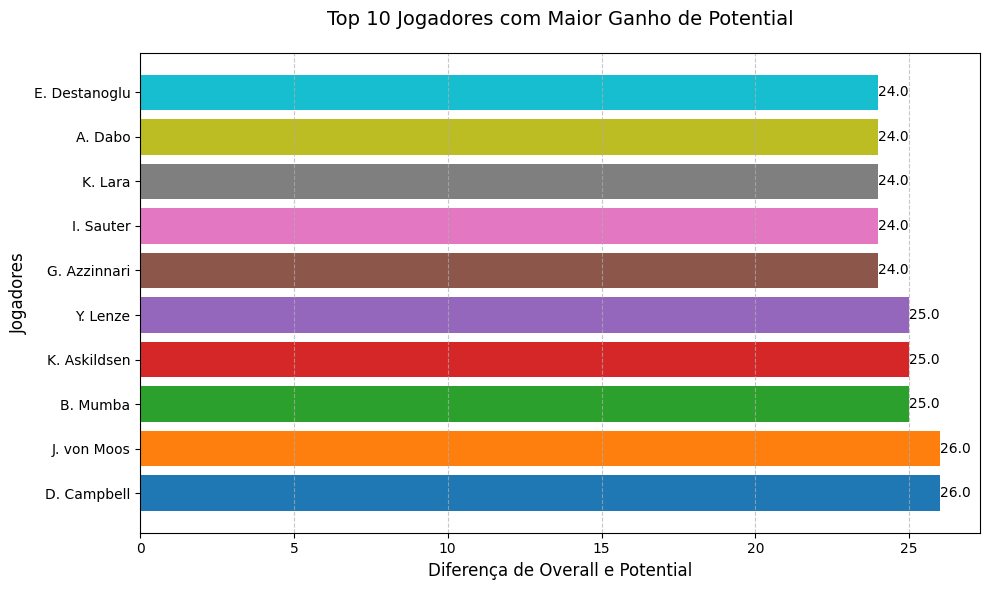

In [105]:
# Top 10 jogadores com maior potencial

# Dados dos jogadores com maior diferença de Overall e Potential
best_dif_potential = dif_pot.nlargest(10, columns='dif_pot_over')
y_value = best_dif_potential['Name']
x_value = best_dif_potential['dif_pot_over']

# Plotagem
fig = plt.figure(figsize=(10, 6))
bars = plt.barh(y_value, x_value, color=plt.cm.tab10.colors)  # Cores diferentes para cada barra

# Adicionar valores exatos nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
             va='center', ha='left', fontsize=10)

# Configurações do gráfico
plt.xlabel('Diferença de Overall e Potential', fontsize=12)
plt.ylabel('Jogadores', fontsize=12)
plt.title('Top 10 Jogadores com Maior Ganho de Potential', fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adicionar grid no eixo X
plt.tight_layout()  # Ajustar layout para evitar cortes

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "top10_ganho_potential.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()

Overall médio (< 23 anos): 61.74
Potential médio (< 23 anos): 73.15


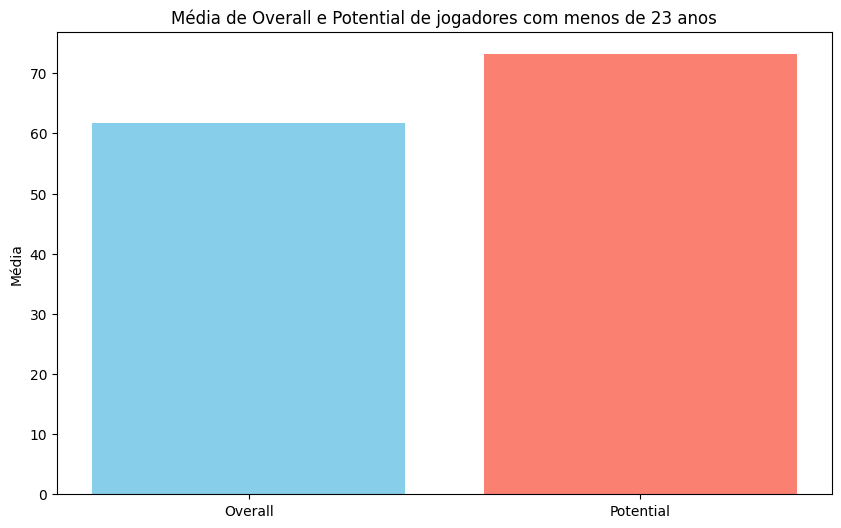

In [104]:
# Filtrar jogadores com menos de 23 anos
jovens = fifa[fifa["Age"] < 23]

# Calcular a média de Overall e Potential desses jogadores
overall_medio_jovens = jovens["Overall"].mean()
potential_medio_jovens = jovens["Potential"].mean()

print(f"Overall médio (< 23 anos): {overall_medio_jovens:.2f}")
print(f"Potential médio (< 23 anos): {potential_medio_jovens:.2f}")

# Criando um gráfico de barras de Overall e Potential
plt.figure(figsize=(10,6))
plt.bar(["Overall", "Potential"], [overall_medio_jovens, potential_medio_jovens], color=['skyblue', 'salmon'])
plt.title("Média de Overall e Potential de jogadores com menos de 23 anos")
plt.ylabel("Média")

# Salvar o gráfico na pasta 'reports'
file_path = os.path.join(reports_path, "overall_and_potential.png")
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Exibindo o gráfico
plt.show()

